In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn.datasets import make_regression

# Generate Data
x, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=5.0, random_state=42)
data = pd.DataFrame({"x" : x.reshape(-1, ), "y" : y})
data

,x,y
0,-1.758739,-31.113105
1,1.031845,10.393095
2,-0.487606,-13.048431
3,0.186454,-0.433708
4,0.725767,12.630296
...,...,...
995,-1.918771,-27.321248
996,0.482472,10.835759
997,0.241962,6.059165
998,1.366874,30.125283


<Axes: xlabel='x', ylabel='y'>

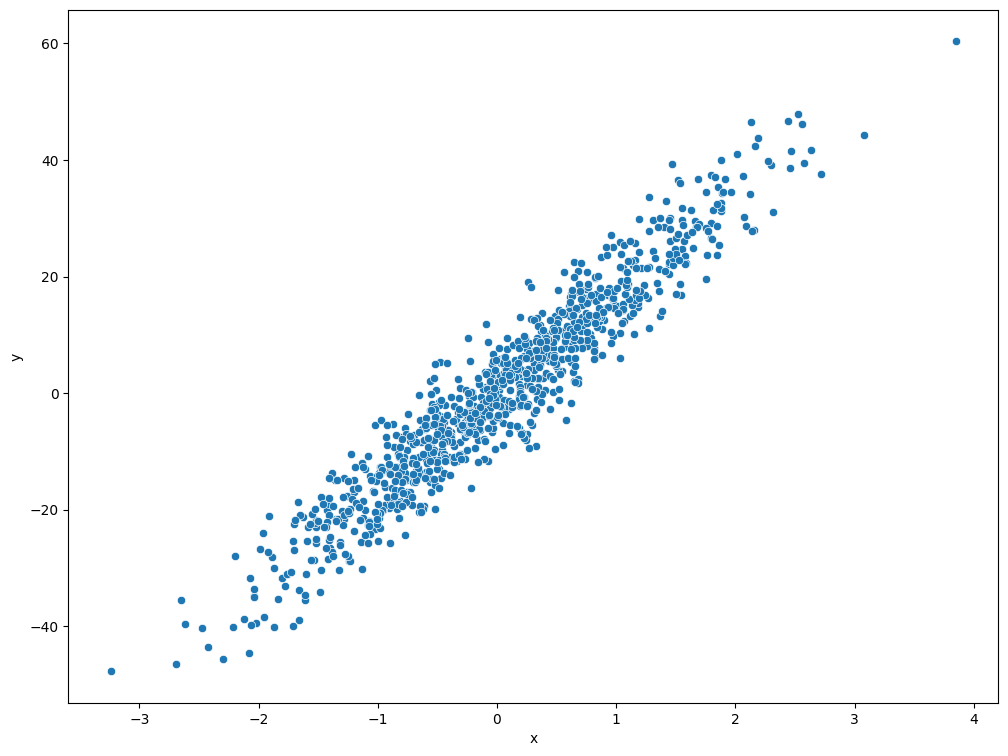

In [2]:
# Data visualization
sns.scatterplot(data=data, x='x', y='y')

In [3]:
def gradient_descent(x, y, w=0.1, b=0.1, learning_rate=1e-2, max_iter=100, tol=1e-4):

    '''
        - 2차원에서의 단변량 Linear Regression 모델의 gradient descent algorithm을 구현합니다.
        - y = wx + b로 정의되며, learning_rate를 입력받아 epochs 만큼 weight update를 진행합니다.
        - max_iter만큼 진행하다가 주어진 max_iter전에 수렴한 것 같다면 멈춰도 됩니다.
        - 수렴 조건은 업데이트 되는 loss가 tol 이하일 때를 의미합니다.
    '''
    num_samples = len(x)
    prev_loss = float('inf')

    for epoch in range(max_iter):
        # 예측값 계산
        y_pred = w * x + b

        # 손실 계산
        loss = np.mean((y_pred - y)**2) #SSE

        # 수렴 조건 확인
        if abs(prev_loss - loss) < tol:
            break

        prev_loss = loss

        # 그래디언트 계산
        dw = 2 * np.mean((y_pred - y) * x)
        db = 2 * np.mean(y_pred - y)

        # 가중치 업데이트
        w -= learning_rate * dw
        b -= learning_rate * db

    ## TO-DO ##
    # gradient descent algorithm 구현하기

    return w, b


<Axes: xlabel='x', ylabel='y'>

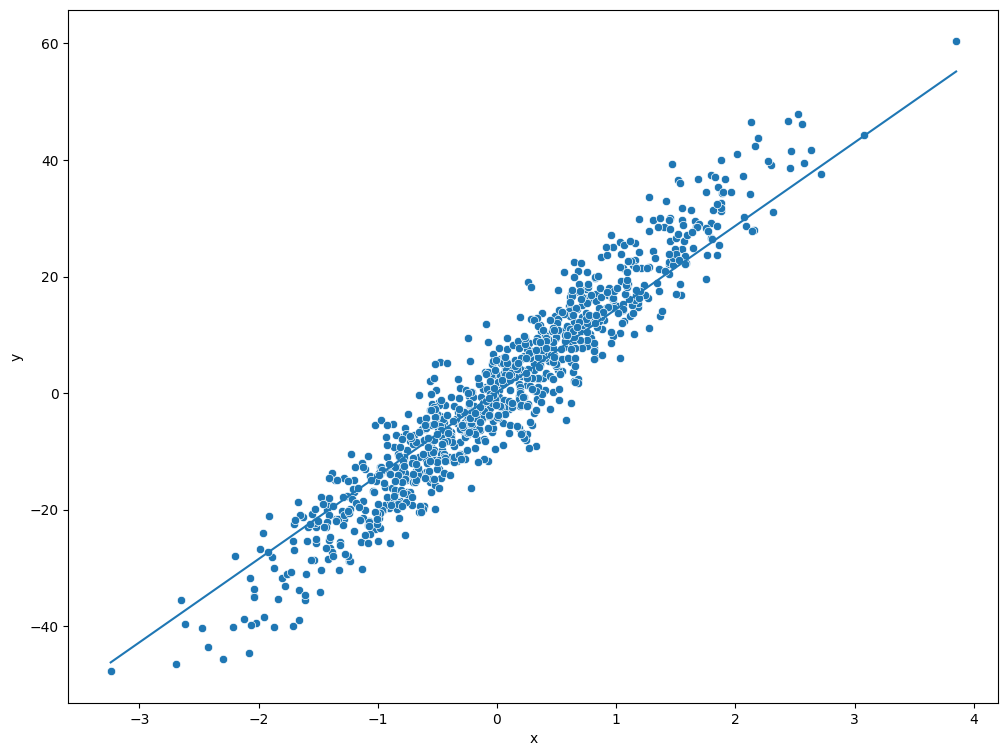

In [4]:
# Visualize Result

w, b = gradient_descent(w=0.1, b=0.1, learning_rate=1e-2, max_iter=100, tol=1e-4, x=data['x'], y=data['y'])

sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data['x'], y=w*data['x'] + b)
